> 

# Project: Investigate a Dataset - [Patients Non-Attendance Appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
The available dataset gathers information from 100k medical appointments of patients in Brazil and is concerned with the question of whether or not patients will attendance for their appointment. A different characteristics about the patients were presented in each row.

● 'Neighborhood' tell us the location of the hospital.

● 'ScheduledDay' refer to what day the patients set up their appointment.

● 'Scholarship' describe whether or not the patients are enrolled in welfare program Bolsa Família.

● 'Hypertension' show whether or not is the patient suffering from Hypertension or not.

●'Diabetes' show whether or not is the patient suffering from Diabetes or not.

●'Alcoholism' tell us whether or not does the patient abuse alcohol.

●'SMS_received' show whether or not is the patient received an appointment message.

● NOTE :  The encoding of the last column: it says 'yes' if they did not attendance to their appointment  , and 'NO' if the patients attendance.




### Question(s) for Analysis
What are the important factors for us to know for predicting  if a patient will attendance  for their scheduled appointment ? 

In [1]:
# Import statements for all of the packages that we will utilize
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as se
%matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

> In this section of the research , we will load the data, investigate , prune and clean the data for purpose of analysis.


### General Properties


In [3]:
# Load the data and store in the variable "df_Patients"  
df_Patients = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [4]:
# Show sample of dataset
df_Patients.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
# Investigating the data shape
print(df_Patients.shape) 

(110527, 14)


The dataset consists of 110527 rows and 14 columns.

In [6]:
#Check for duplicate values
print(df_Patients.duplicated().sum())

0


No identical rows

In [7]:
# Check some information from summary of the data
df_Patients.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


It's seen that , the maximum age is 115 , mean age is 37 , and the minimum is -1 that is an irrational value . However, We will look for other values have the same issue and then deal with them.Further, about 25% receive a message . 
In addation , most of Patients didn't have chronic disease and 50% of the age are ranges from 18 to 55.

In [8]:
# Determine where is the wrong age
wrong_age = df_Patients.query('Age == -1')
wrong_age

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [9]:
# Investigating whether there is missing values
df_Patients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


No Null values 

In [10]:
# Investigating the number of unique values of patients 
print(df_Patients['PatientId'].nunique())

62299


There are  62299 from  110527 patients  have more than one appointment

In [11]:
# Investigating the number of duplicate data in PatientId
print(df_Patients['PatientId'].duplicated().sum())

48228


There are 48228 patients have same ID

In [12]:
#Investigating status of Non-Attendance for duplicated Patients
print(df_Patients.duplicated(['PatientId', 'No-show']).sum())

38710


There are 38710 patients have same status and should be cleand


### Data Cleaning

In this section , we will cancel the wrong detected data that may be impact the results .In addition, delete the unuseful data.

In [13]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
# Drop the Age that is equal -1 that are label wrong_age with index of 99832
df_Patients.drop(index = 99832 , inplace = True)

It seen that , the minimum Age equal zero

In [14]:
#Delete patients that have identical status of showing
df_Patients.drop_duplicates(['PatientId', 'No-show'] , inplace = True)

In [15]:
# Delete unused columns of data in the analysis
df_Patients.drop(['PatientId', 'ScheduledDay','AppointmentDay','AppointmentID'] , axis = 1, inplace = True)

In [16]:
#Rename some of columns 
df_Patients.rename(columns = {'Hipertension': 'Hypertension',
                     'No-show':'Non_Attendance'}, inplace = True)

In [17]:
#Check the data shape after deleting the wrong_age , identical status and unused columns   
print(df_Patients.shape)  

(71816, 10)


The new number of rows data equal 71816 ( 110526 - 1- 38710 ).The new number of columns data equal 10.

In [18]:
#Examine the data after modifications 
df_Patients.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,Non_Attendance
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis

Now, After cleaning and trimmining data.We will move to exploration, such as Computeing statistics and visualizations to examine the research questions that presented in the Introduction section. 



### Investigate the status of Patients based on different characteristics

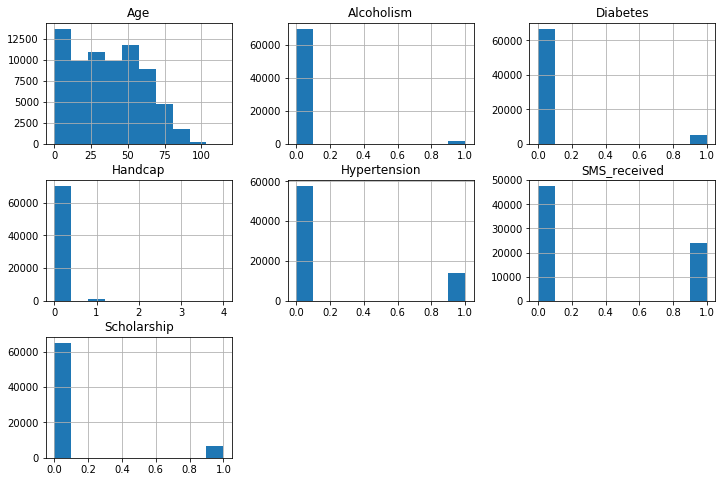

In [19]:
df_Patients.hist(figsize=(12,8));

Most of Patients didn't have chronic disease.
Most of Patients didn't drink alcohol. 
Only Half of Patients receive the SMS message.
Majority of Patients didn't enrolled in welfare program Bolsa Família.   

### Research Question 1 (What is relation between registration and Non-Attendance Appointments!)

In [20]:
#Dividing the the patients into two parts based on Attendance or Non-Attendance.
patient_Attendance= df_Patients.Non_Attendance == 'No'
patient_NonAttendance  = df_Patients.Non_Attendance == 'Yes'
pd.DataFrame([df_Patients[patient_Attendance].count(), df_Patients[patient_NonAttendance].count()], index= ['Attendance', 'Non Attendance'])

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,Non_Attendance
Attendance,54153,54153,54153,54153,54153,54153,54153,54153,54153,54153
Non Attendance,17663,17663,17663,17663,17663,17663,17663,17663,17663,17663


According to the previous results, it was concluded that, the patients who are  Attendance is 3 times greater than the patients that are Non-Attendance.

In [21]:
# Computing the mean
pd.DataFrame([df_Patients[patient_Attendance].mean(), df_Patients[patient_NonAttendance].mean()], index= ['Attendance', 'Non Attendance'])

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received
Attendance,37.229166,0.091334,0.202944,0.072868,0.02360,0.020904,0.297232
Non Attendance,34.376267,0.108419,0.170922,0.065108,0.02944,0.017777,0.453094


It is seen that the mean age of patients who Attendance is 37 years old while the patients  who didn't = 34 years old


### Research Question 2  (Does the Age impact on the attendance rate? )

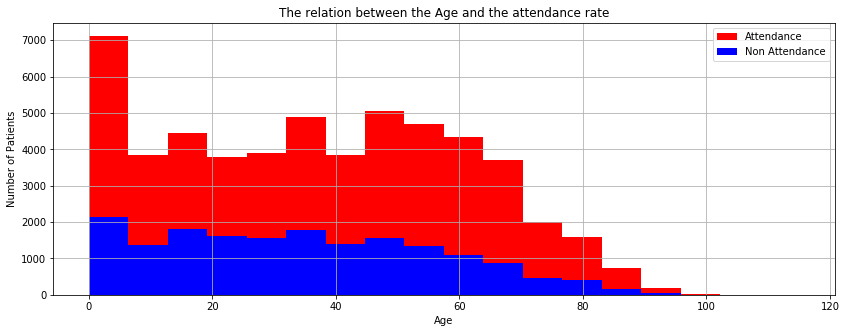

In [22]:
def Attendance_rate(df_Patients,col_name):
    plt.figure(figsize =(14,5)) # Size of graph
    df_Patients[col_name][patient_Attendance].hist(alpha=1, bins=18, color='red', label= 'Attendance')
    df_Patients[col_name][patient_NonAttendance].hist(alpha=1, bins=18, color='blue', label= 'Non Attendance')
    plt.xlabel(f"{col_name}")
    plt.ylabel("Number of Patients")
    plt.title('The relation between the Age and the attendance rate')
    plt.legend()
Attendance_rate(df_Patients,'Age')


The graph show that , the patients of age between 0 to 8 years are most Attendance (due to the parents' interest). However its seen that , with increasing Age the Attendance  was decreased. 

### Research Question 3 (Does the received  SMS impact on Attendance rate?? )

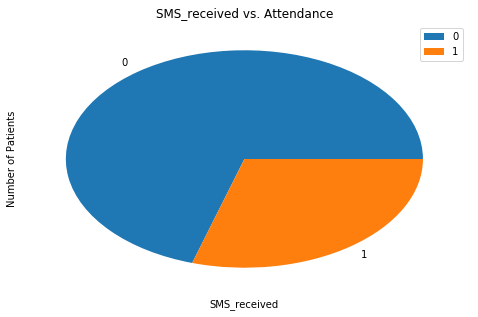

In [23]:
#Investigate the impact of received SMS  on the Aattendance 
plt.figure(figsize =(8,5)) # Size of figure
df_Patients['SMS_received'][patient_Attendance].value_counts().plot(kind='pie')
plt.xlabel("SMS_received")
plt.ylabel("Number of Patients")
plt.title("SMS_received vs. Attendance")
plt.legend()


We conclude that the patients who Aattendance without receiveing  SMS is about 75 % of all patients   

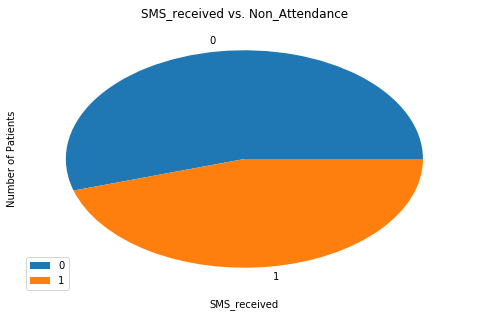

In [24]:
#Investigate the impact of received SMS on the Non-Aattendance 
plt.figure(figsize =(8,5)) # Size of figure
df_Patients['SMS_received'][patient_NonAttendance].value_counts().plot(kind='pie')
plt.xlabel("SMS_received")
plt.ylabel("Number of Patients")
plt.title("SMS_received vs. Non_Attendance")
plt.legend()

It is seen that about of 50% of the patients  that are receiveing  SMS are absent 

### Research Question 4 (Does the Gender impact on attendance rate? )

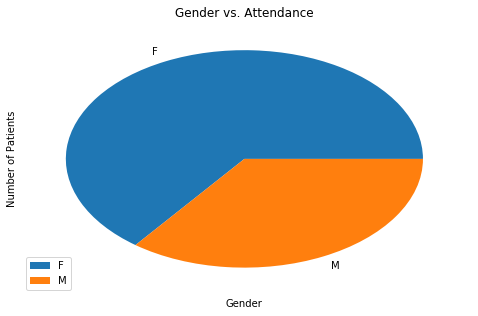

In [25]:
#Investigate the impact of Gender on the Aattendance 
plt.figure(figsize =(8,5)) # Size of figure
df_Patients['Gender'][patient_Attendance].value_counts().plot(kind='pie')
plt.xlabel("Gender")
plt.ylabel("Number of Patients")
plt.title("Gender vs. Attendance")
plt.legend()

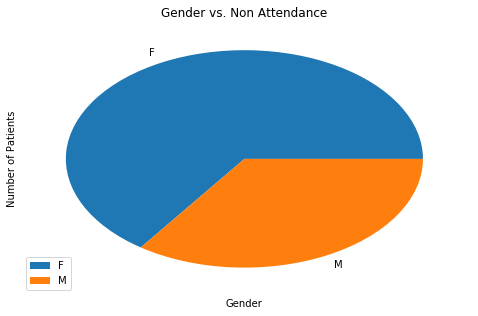

In [26]:
#Investigate the impact of Gender  on the Non-Aattendance 
plt.figure(figsize =(8,5)) # Size of figure
df_Patients['Gender'][patient_NonAttendance].value_counts().plot(kind='pie')
plt.xlabel("Gender")
plt.ylabel("Number of Patients")
plt.title("Gender vs. Non Attendance")
plt.legend()

The last two figures show that ,the gender does not impact on attendance rate

### Research Question 5 (Does a chronic disease (Hypertension and diabetes)  impact on the attendance rate along with the effect of age? )

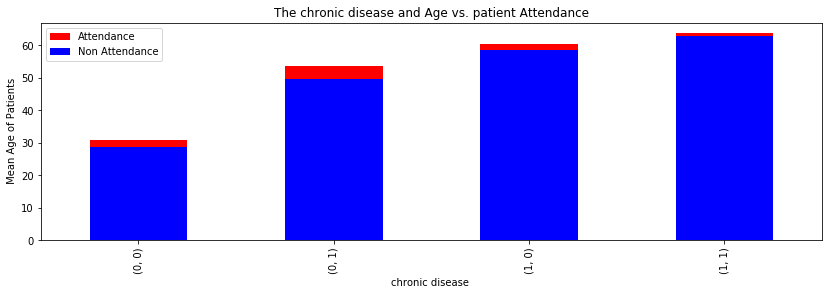

In [27]:
#Investigate the impact of chronic disease (Hypertension and diabetes) on the Aattendance rate along with the effect of age
plt.figure(figsize =(14,4)) # Size of figure
df_Patients[patient_Attendance].groupby(['Hypertension','Diabetes']).mean()['Age'].plot(kind='bar', color='red', label= 'Attendance')
df_Patients[patient_NonAttendance].groupby(['Hypertension','Diabetes']).mean()['Age'].plot(kind='bar', color='blue', label= 'Non Attendance')
plt.xlabel("chronic disease ")
plt.ylabel(" Mean Age of Patients")
plt.title("The chronic disease and Age vs. patient Attendance")
plt.legend()

The majority of patients with mean age of 30 years are Non attendance  and dont not suffer from chronic disease. Further, the patients with mean age about 50 years and suffer from only Hypertension are Non attendance . In addtion to, the patients with mean age about 55 years and suffer from only  Diabetes are Non attendance. Finally,  majority the patients with mean age about 60 years and suffer from both Hypertension  and Diabetes are Non attendance

In [28]:
# For more investigation to prove the previous conclusions , let's see the numerical values 
print(df_Patients[patient_Attendance].groupby(['Hypertension','Diabetes']).mean()['Age'])
print('-------------------------------------------------------------------')
print(df_Patients[patient_NonAttendance].groupby(['Hypertension','Diabetes']).mean()['Age'])

Hypertension  Diabetes
0             0           30.713360
              1           53.701370
1             0           60.270517
              1           63.764303
Name: Age, dtype: float64
-------------------------------------------------------------------
Hypertension  Diabetes
0             0           28.768691
              1           49.481172
1             0           58.650380
              1           62.913282
Name: Age, dtype: float64


From this numerical values , it is see that the Patients Attendance rate  is not affected by chronic disease  

### Research Question 6 (Does a Genedr  (F or M)  impact on the attendance rate along with the effect of age? )

In [ ]:
# Investigate the impact of Genedr (F or M)on the Aattendance rate along with the effect of age
plt.figure(figsize =(14,4)) # Size of figure
df_Patients[patient_Attendance].groupby(['Gender']).Age.mean().plot(kind='bar', color='blue', label= 'Attendance')
df_Patients[patient_NonAttendance].groupby(['Gender']).Age.mean().plot(kind='bar', color='red', label= 'Non Attendance')
plt.xlabel("patients Gender")
plt.ylabel("Mean Age of Patients")
plt.title("Gender and Age vs. Attendance rate")
plt.legend()

There is no correlation between the Genedr  and age impacting on Attendance rate  

In [ ]:
# For more investigation to prove the previous conclusions , let's see the numerical values 
print(df_Patients[patient_Attendance].groupby(['Gender']).Age.mean())
print('-------------------------------------------------------------------')
print(df_Patients[patient_NonAttendance].groupby(['Gender']).Age.mean())

From the numerical values , it is conclude  that the Patients Attendance rate is not affected by gender. Only , the number of female are hgher than the male  

### Research Question 7 (Does the patient's location impact on attendance rate ?)

In [ ]:
# Check the impact of  patient's location on the Aattendance rate
plt.figure(figsize =(14,5)) # Size of graph
df_Patients.Neighbourhood[patient_Attendance].value_counts().plot(kind = 'bar', color='blue', label= 'Attendance')
df_Patients.Neighbourhood[patient_NonAttendance].value_counts().plot(kind = 'bar', color='red', label= 'Non Attendance')
plt.xlabel("location of Patients")
plt.ylabel("Number of Patients")
plt.title('The patient location vs. the Attendance rate')
plt.legend()


From the figure, it is proven that the Neighbourhood has a great impact on the attendance rate of patients

### Research Question 8 (Does the patient's mean age and location impact on attendance rate ?)

In [ ]:
# Check the impact of  patient's mean age and location on the Aattendance rate
plt.figure(figsize =(14,4)) # Size of figure
df_Patients[patient_Attendance].groupby(['Neighbourhood']).Age.mean().plot(kind='bar', color='blue', label= 'Attendance')
df_Patients[patient_NonAttendance].groupby(['Neighbourhood']).Age.mean().plot(kind='bar', color='red', label= 'Non Attendance')
plt.xlabel("location of Patients")
plt.ylabel("Mean Age of Patients")
plt.title("location and Age vs. Attendance")
plt.legend()

From the bar chart , it is conclude that the mean age varies from one city to another, however this impacts on the attendance rate.

### Research Question 9 (Does the location of patients when receiving SMS message impact on attendance rate?)


In [ ]:
# Check the impact of patient's location when receiving SMS message on the Aattendance rate
plt.figure(figsize =(16,7)) # Size of figure
df_Patients[patient_Attendance].groupby(['Neighbourhood']).SMS_received.mean().plot(kind='bar', color='black', label= 'Attendance')
df_Patients[patient_NonAttendance].groupby(['Neighbourhood']).SMS_received.mean().plot(kind='bar', color='red', label= 'Non Attendance')
plt.xlabel("location of Patients")
plt.ylabel("Number of Patients")
plt.title("location and  received SMS vs. Attendance")
plt.legend()


From the previous result, we conclude that the patient’s location had an effect on delivering the message only in 5 regions.

<a id='conclusions'></a>
## Conclusions
• In conclusion, it is proven that ,sending the SMS does not significantly impact on the attendance of patients.

• The patient's region has greatly impacts on the percentage of the attendance of patients .

• The age has graet impact on attendance.However its seen that , with increasing Age the Attendance was decreased.  

• Other factors such as the gender does not impact on attendance rate .


### Limitations

• The detailed information of Previous medical condition of each patient didnt includeded in the data.

• There are  many factors that had no clear impact.



In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])